<a href="https://colab.research.google.com/github/unitxero/Data_Analysis_MC/blob/main/Iris_Dataset_KNN_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# reading in data from github raw
df = pd.read_csv("https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv")

In [ ]:
# inspecting the DataFrame to see what is going on
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# dropping the Id column as it is redundant, we don't need it for indexing
df.drop('Id', axis = 1, inplace = True)

In [ ]:
# checking that the column is removed
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# importing StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

In [ ]:
# assigning the StandardScaler() function to scalar
scalar = StandardScaler()

In [ ]:
# so we are dropping what we want to predict 'Species' from the dataframe
# fitting a model afterwards
scalar.fit(df.drop('Species', axis = 1))

StandardScaler()

In [ ]:
# we scaled the features which contained Sepal Length & Width along with Petal Length & Width
scaled_features = scalar.transform(df.drop('Species', axis = 1))

In [ ]:
# creating a new data frame without the Species column and scaled features
df_feature = pd.DataFrame(data = scaled_features,
                          columns = df.columns[:-1])

In [ ]:
df_feature.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

# splitting the data 30% testing, 70% training
X_train, X_test, y_train, y_test = train_test_split(scaled_features,
                                                    df['Species'],
                                                    test_size = 0.30)

In [ ]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# setting KNN Classifier to nearest neighbors 1
# and saving it to knn var
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
# fitting a model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# running predictions on X_test (testing data)
predict = knn.predict(X_test)

In [ ]:
# showing the array of predictions
predict

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
# lets create the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# confusion matrix print out
print(confusion_matrix(y_test, predict))

[[17  1  0]
 [ 0 12  0]
 [ 0  0 15]]


In [45]:
# creating list for x-axis and y-axis label on sns.heatmeap
class_names = ['Setosa', 'Virginica','Versicolor']

## Insight on K = 1

Setosa is 0 on the x-axis
Versicolor is 1 on the x-axis
Virginica is 2 on the x-axis

At K=1 the machine learning model was able to predict with 100% accuracy
the plants that should have been Setosa and Virginica.
We had a 92% accuracy on identifying the Versicolor plant.
We don't really need to go past k=1 to see great results.

This is also telling us that, just with the length and width of the Sepal and the Pedal, a machine is able to identify a plant. It doesn't need color, if it is a plant, or any other attributes to successfuly identify in this dataset.

Text(0.5, 1.0, 'Accuracy Score:0.9555555555555556')

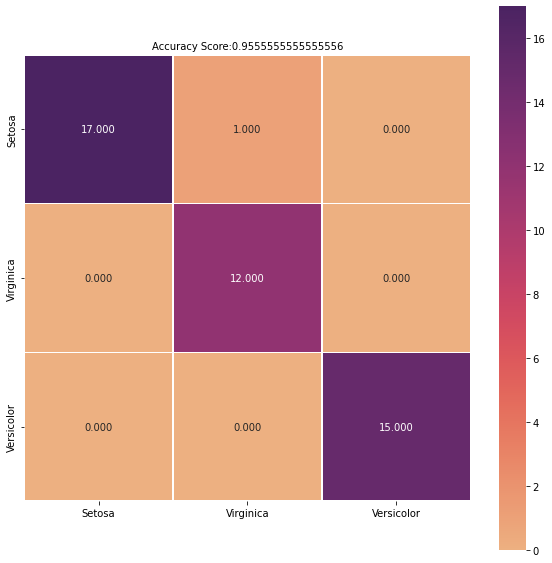

In [46]:
# confusion matrix plotted for better interpretation

plt.figure(figsize = (10, 10))

sns.heatmap(confusion_matrix(y_test, predict),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare",
            xticklabels = class_names,
            yticklabels = class_names)
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

In [ ]:
# printing classification report on y_testing and prediction variable
# here we see the precision, recall and f1 score, along with accuracy
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        18
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
### Repeat above steps for k = 5, see what happens with Accuracy

In [ ]:
# setting the Knn to 5  neighborhood
knn5 = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predict2 = knn5.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, predict2))

[[17  1  0]
 [ 0 12  0]
 [ 0  0 15]]


In [42]:
# creating list for x-axis and y-axis label on sns.heatmeap
class_names = ['Setosa', 'Virginica','Versicolor']

## Insight on K = 5

We see the same findings as the previous insight, with no remarkable changes
to note.



Text(0.5, 1.0, 'Accuracy Score:0.9777777777777777')

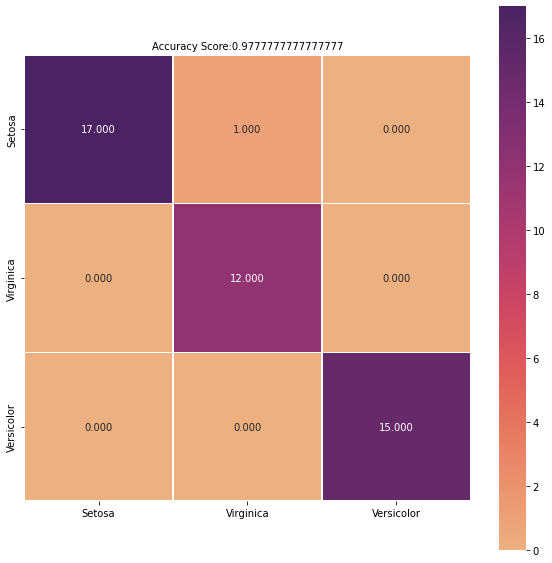

In [44]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(y_test, predict2),
            annot = True,
            fmt = '.3f',
            linewidths = .5,
            square = True,
            cmap="flare",
            xticklabels = class_names,
            yticklabels = class_names)
plt.ylabel = ('Actual label')
plt.xlabel = ('Predicted label')
all_sample_title = f'Accuracy Score:{knn5.score(X_test, y_test)}'
plt.title(all_sample_title, size = 10)

## K Value and Accuracy

In [ ]:
# this is a place holder for Accuracy
from sklearn import metrics
score = []

In [ ]:
# running KNN from 1 to 40 for nearest neighbors and seeing the scores for accuracy
# storing these results in the score variable
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556]


## K values 1 - 39

We see the accuracy is pretty much not changing from k=6 to k=33
But there is an interesting anamoly that occurs after k=33.
The accuracy begins to decrease. This may be due to the amount of neighbors that
a plant can be grouped with. A reason could also be that the model is beginning to underfit the data, meaning it is interpreting the data too loosely.

TypeError: ignored

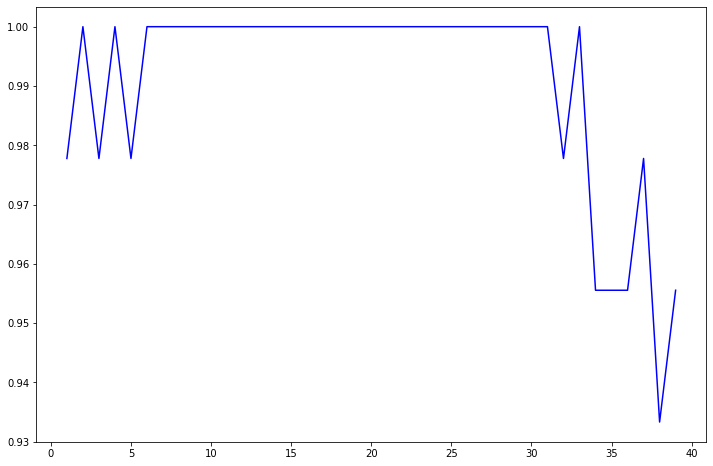

In [ ]:
# creating a plot to see how the K value affects accuracy
# from K values 1 to 39
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color = 'blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
# running KNN from 1 to 40 for nearest neighbors and seeing the error rate
# storing these results in the error_rate variable
error_rate = []

for i in range(1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

## Insight 3

When we ran and plotted the error rate
We see that from k=5 to k=33~
the error rate is 0. The model is 100% accurate at all times.
As we increase the k values past 33 though, we see error rate increase dramatically. This matches our decrease in accuracy in the previous insight.

TypeError: ignored

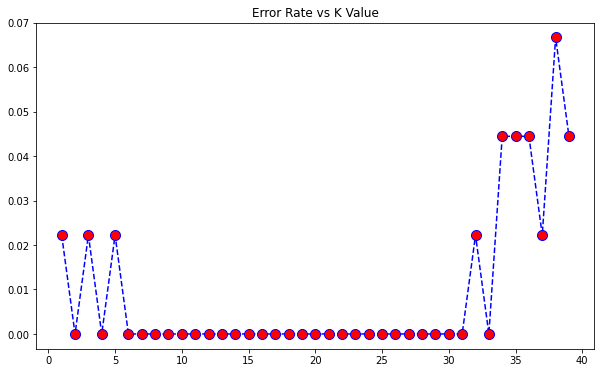

In [ ]:
# plotting the error rate to see how it interacts with the previous chart which
# shows accuracy
# seems k = 15 would be ideal to select 
# in terms of lower error rate (0.045%), and satisfactory accuracy of 93.5%

plt.figure(figsize = (10,6))
plt.plot(
         range(1,40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 10
         )
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")